In [1]:
from binance.client import Client
from binance import ThreadedWebsocketManager
import pandas as pd
import numpy as np

In [2]:
#test api_key
test_api_Key = "ni1RGarrqKhXFMnmqZt2EEbEJkpGDXs4AxHml3r7aevzg7uqUR1rTFbNngWiTOln"
test_secret_Key = "HqFm7zQNQPOEJdYMgLho7engJbah6FAH98Eqf607h467CB9RM9e6dHDytnQbKGgk"

In [3]:
client = Client(api_key = test_api_Key, api_secret = test_secret_Key, tld = "com", testnet = True)
client

##### **A simple random Trading Bot:** Stream Market Data and buy 0.1BTC(with USDT) once condition x (Price and/or Volume)
##### has been met. Then stop the Stream

##### condition x: Price (rounded down) is divisible by 10 without remainder. 컨디션 x란 소수점 아래를 반올림한 값이 10으로 딱 떨어질 때 0.1 비트코인을 매수. '%'연산자를 이용함.
##### 시장 데이터를 스트림하고 특정 조건이 성립하면 usdt로 0.1의 비트코인을 매수한다. 비트코인 매수시 스트림 중단


In [4]:
twm = ThreadedWebsocketManager()
twm.start()

#### Using the Miniticker Stream : 
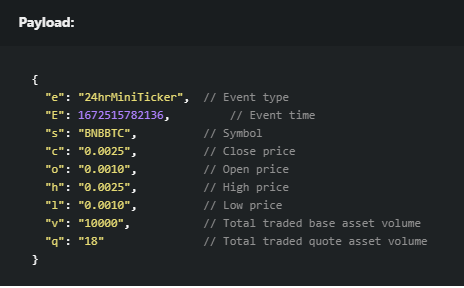


In [5]:
def simple_bot(msg):
    ''' define how to process incoming Websocket messages'''
    time = pd.to_datetime(msg["E"], unit ="ms")
    price = float(msg["c"]) #종가

    print("Time: {} | Price: {}".format(time,price))

    if int(price) % 10 == 0: #종가의 반올림값이 10단위로 떨어질때 
        order = client.create_order(symbol = "BTCUSDT", side = "BUY", type = "MARKET", quantity = 0.01)
        #create_order()의 응답 데이터 컬럼
        #executedQty = "주문의 실행된 수량(Executed Quantity)을 나타낸다."
        #cummulativeQuoteQty = "누적된 총 거래액(Cumulative Quote Quantity)을 나타낸다"
        print("\n" + 50 * "-")
        print("Buy {} BTC for {} USDT".format(order["executedQty = "], order["cummulativeQuoteQty"])) # 주문한 코인을 얼마의 USDT로 샀다는 뜻 
        print(50 * "-" + "\n")

        twm.stop()
        

In [6]:
twm.start_symbol_miniticker_socket(callback = simple_bot, symbol = "BTCUSDT")

'btcusdt@miniTicker'

Time: 2024-02-25 20:14:52.567000 | Price: 51899.99
Time: 2024-02-25 20:14:53.308000 | Price: 51900.0

--------------------------------------------------
Buy 0.01000000 BTC for 517.11691900 USDT
--------------------------------------------------



In [7]:
client.get_account()

{'makerCommission': 0,
 'takerCommission': 0,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'commissionRates': {'maker': '0.00000000',
  'taker': '0.00000000',
  'buyer': '0.00000000',
  'seller': '0.00000000'},
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'brokered': False,
 'requireSelfTradePrevention': False,
 'preventSor': False,
 'updateTime': 1708892093729,
 'accountType': 'SPOT',
 'balances': [{'asset': 'ETH', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'BTC', 'free': '1.14928000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '7.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '1.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '2429.23442880', 'locked': '0.00000000'},
  {'asset': 'TRX', 'free': '4027.00000000', 'locked': '0.00000000'},
  {'asset': 'XRP', 'free': '996.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '45.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '177.0000000